In [ ]:
with open('common_words.txt', 'r') as file:
    common_words = [line.strip() for line in file]


In [ ]:
import numpy as np

embeddings_index = {}
with open('glove.6B.50d.txt', 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


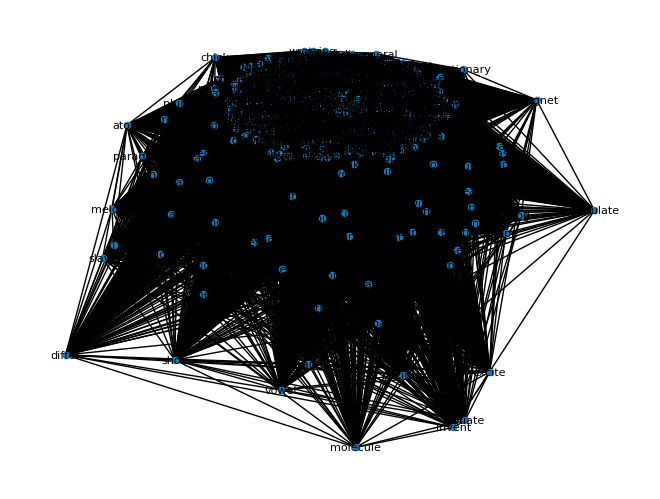

In [ ]:
import pandas as pd

# Create a DataFrame to store the embeddings
embedding_matrix = np.zeros((len(common_words), 50))

for i, word in enumerate(common_words):
    if word in embeddings_index:
        embedding_matrix[i] = embeddings_index[word]
    else:
        embedding_matrix[i] = np.random.randn(50)

df = pd.DataFrame(embedding_matrix, columns=[f'dim_{i}' for i in range(50)])
df['word'] = common_words


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, random_state=42)
df['cluster'] = kmeans.fit_predict(embedding_matrix)

# Print contents of any ten vectors
for i in range(10):
    print(f"Cluster {df.iloc[i]['cluster']}: {df.iloc[i]['word']} - {df.iloc[i].drop('word').drop('cluster').values}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 22: the - [0.4180000126361847 0.24967999756336212 -0.41242000460624695
 0.1216999962925911 0.3452700078487396 -0.044456999748945236
 -0.4968799948692322 -0.17861999571323395 -0.0006602299981750548
 -0.6565999984741211 0.2784300148487091 -0.14767000079154968
 -0.5567700266838074 0.14657999575138092 -0.009509500116109848
 0.011657999828457832 0.10204000025987625 -0.127920001745224
 -0.8442999720573425 -0.12180999666452408 -0.016800999641418457
 -0.33278998732566833 -0.15520000457763672 -0.23130999505519867
 -0.1918099969625473 -1.8823000192642212 -0.7674599885940552
 0.09905099868774414 -0.42124998569488525 -0.19526000320911407
 4.0071001052856445 -0.1859399974346161 -0.5228700041770935
 -0.3168100118637085 0.0005921300034970045 0.007444899994879961
 0.17778000235557556 -0.15896999835968018 0.012040999718010426
 -0.05422300100326538 -0.2987099885940552 -0.15749000012874603
 -0.3475799858570099 -0.04563700035214424 -0.4425100088119507
 0.1878499984741211 0.002784899901598692 -0.18

# Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(embedding_matrix)
mean_similarity = np.mean(cosine_sim_matrix)
std_similarity = np.std(cosine_sim_matrix)


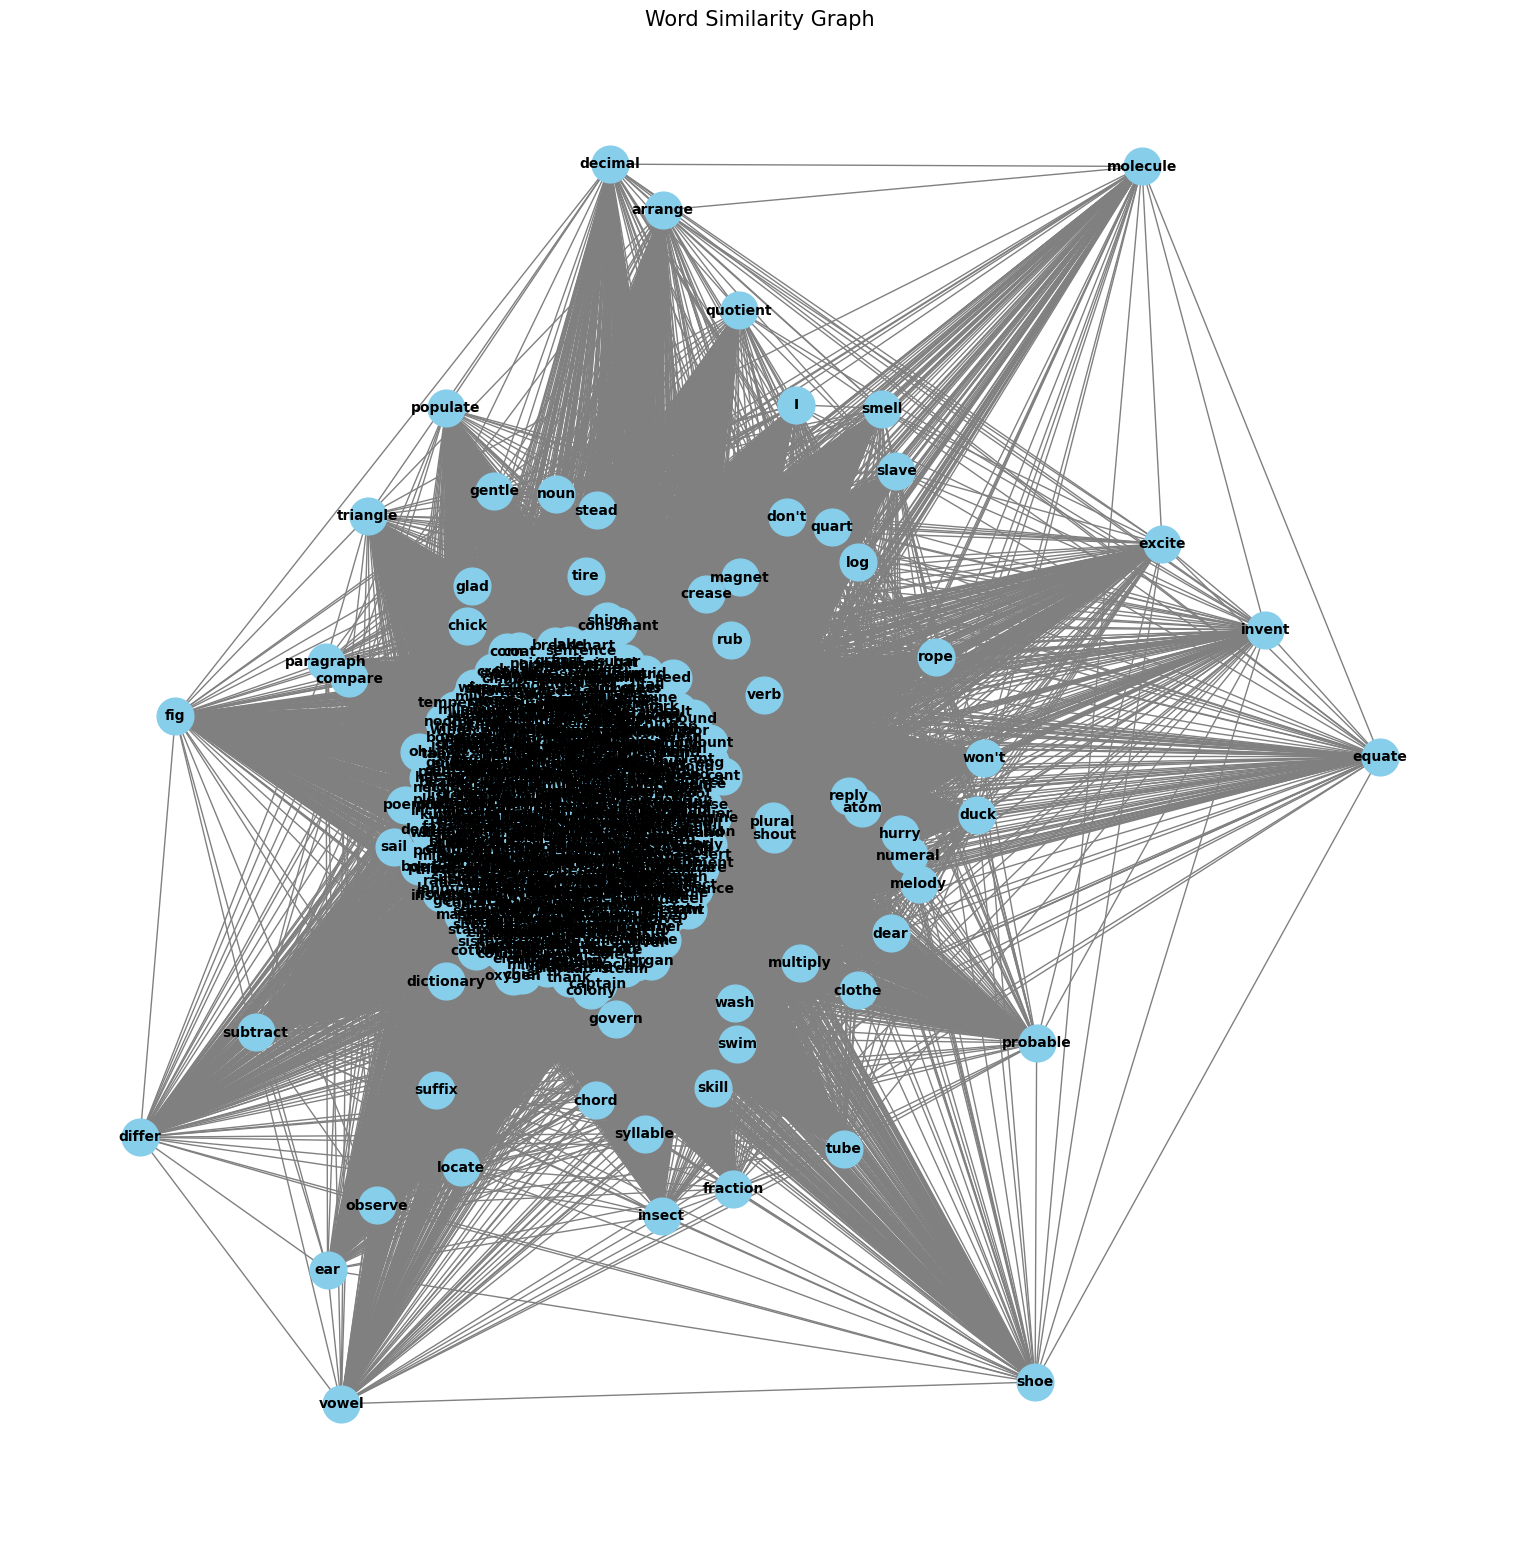

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i, word1 in enumerate(common_words):
    G.add_node(word1)
    for j, word2 in enumerate(common_words):
        if i < j:
            similarity = cosine_sim_matrix[i, j]
            if similarity > (mean_similarity - 2 * std_similarity):
                G.add_edge(word1, word2, weight=similarity)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=20, font_size=8)
plt.show()


In [ ]:
low_similarity_pairs = []

# Iterate over all word pairs and check if they belong to the same cluster but have low cosine similarity
for i, word1 in enumerate(df['word'].values):
    for j, word2 in enumerate(df['word'].values):
        if i < j and df['cluster'][i] == df['cluster'][j]:
            similarity = cosine_sim_matrix[i, j]
            if similarity < threshold:
                low_similarity_pairs.append((word1, word2, similarity))

print("Low similarity word pairs in the same cluster:")
for pair in low_similarity_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")
